# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Maria Sofia! 👏🚀 Seu trabalho está muito bom! Espero que você esteja orgulhosa do seu trabalho. 😊
    
Adicionei alguns comentários apenas como dicas e sugestões de aprimoramento. 

Te desejo sucesso na sua jornada!
</div>

# Model Fitness

* Maria Sofia
* Data: Abril de 2025

In [21]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [22]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

## Realizar análise exploratória dos dados (AED)

In [24]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* Clientes que moram perto e deixaram telefone são maioria — ótimo para ações de retenção local e via mensagem.

* A rotatividade é significativa (26,5%) e parece haver potencial de retenção por fidelização de contratos mais longos.

* Como a frequência atual está menor que a média histórica, pode ser um sinal precoce de churn.

In [25]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


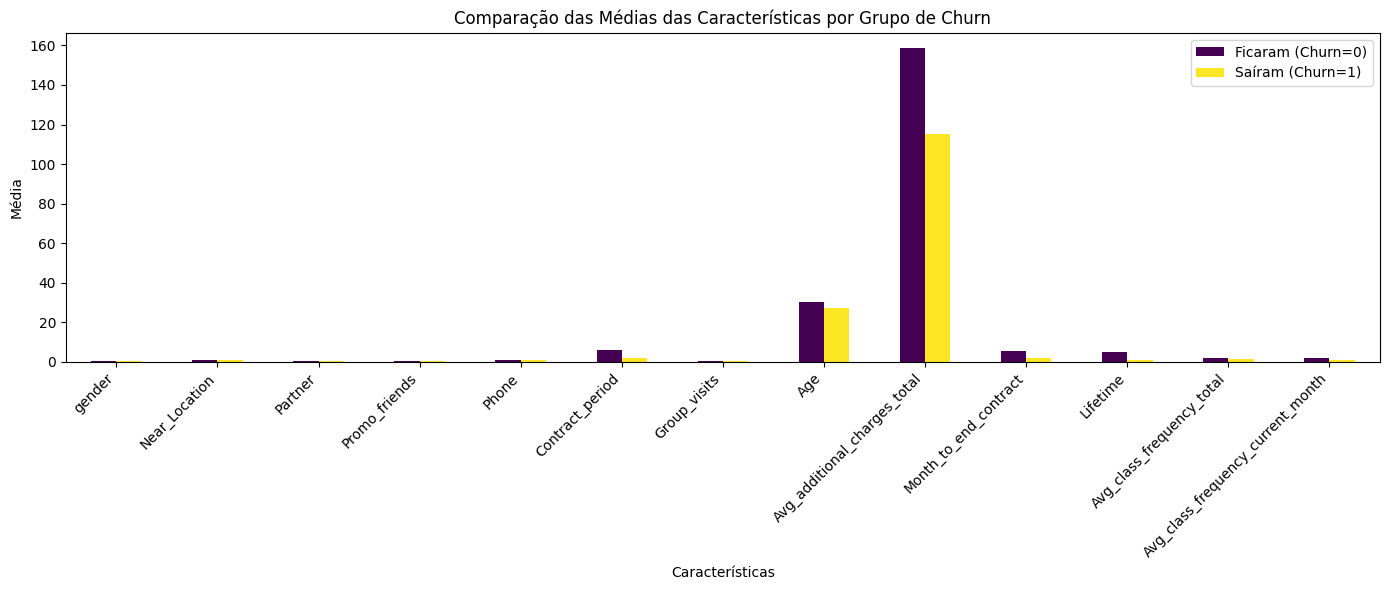

In [26]:
# Agrupar por churn e calcular a média
grouped_means = df.groupby('Churn').mean()

# Transpor para facilitar a plotagem (Churn será o eixo x)
grouped_means.T.plot(kind='bar', figsize=(14, 6), colormap='viridis')

plt.title('Comparação das Médias das Características por Grupo de Churn')
plt.xlabel('Características')
plt.ylabel('Média')
plt.xticks(rotation=45, ha='right')
plt.legend(['Ficaram (Churn=0)', 'Saíram (Churn=1)'])
plt.tight_layout()
plt.show()

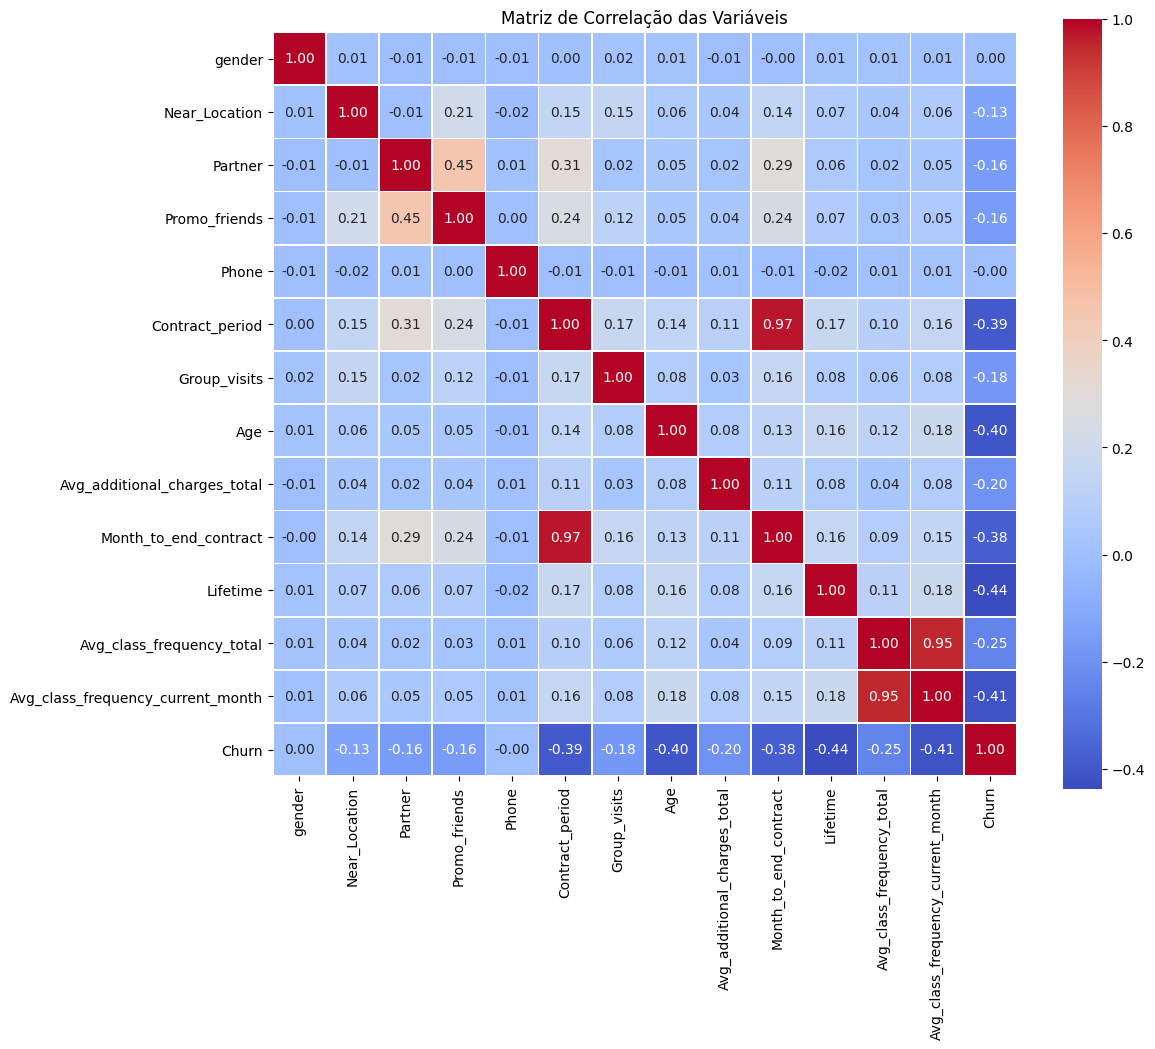

In [27]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Cria o heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Matriz de Correlação das Variáveis")
plt.show()

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente.
- Todos os gráficos foram plotados corretamente.
- Análises descritivas enriqueceram a análise. Parabéns!
    
    
Observação: 
    
Bom trabalho nas matrizes de correlação utilizando `corr()`! No entanto, vale lembrar que o `corr()` é excelente para variáveis numéricas, mas não é a melhor ferramenta para analisar a correlação entre variáveis categóricas. Por exemplo, mesmo que o gênero seja representado como 0 e 1, ele ainda é uma variável categórica com duas categorias distintas. Embora o uso do `corr()` não seja errado, pode levar a correlações que não refletem a realidade das variáveis categóricas.

Para medir a correlação entre variáveis categóricas, os métodos mais apropriados são:

- **Teste Qui-Quadrado de Independência**: Este teste verifica se há uma associação significativa entre duas variáveis categóricas, comparando a frequência observada em cada categoria com as frequências esperadas se as variáveis fossem independentes. Um resultado significativo indica que as variáveis podem estar associadas.

- **V de Cramér**: Esta medida de associação, derivada do teste Qui-Quadrado, é usada para variáveis nominais. Ela fornece um valor entre 0 e 1, onde 0 indica nenhuma associação e 1 indica uma associação forte. É útil para avaliar a força da relação após um resultado significativo no teste Qui-Quadrado.

- **Coeficiente Phi**: Este coeficiente é adequado para tabelas de contingência 2x2 e mede a associação entre variáveis categóricas binárias. Assim como o V de Cramér, seu valor varia de -1 a 1, onde 0 indica nenhuma associação. 
</div>

##  Construindo um modelo para predizer a rotatividade de clientes

In [28]:
# Separar recursos e variável-alvo

from sklearn.model_selection import train_test_split

# Definir X e y
X = df.drop('Churn', axis=1)  # todas as colunas exceto 'Churn'
y = df['Churn']               # coluna-alvo

In [29]:
# Dividir em treino e validação:

# Dividir os dados em treino e validação (80% treino, 20% validação)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo 1: Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Modelo 2: Floresta Aleatória
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Previsões com os dois modelos
y_pred_log = log_model.predict(X_valid)
y_pred_rf = rf_model.predict(X_valid)

In [32]:
# Regressão Logística
print("Regressão Logística:")
print("Acurácia:", accuracy_score(y_valid, y_pred_log))
print(classification_report(y_valid, y_pred_log))
print(confusion_matrix(y_valid, y_pred_log))

# Floresta Aleatória
print("\nFloresta Aleatória:")
print("Acurácia:", accuracy_score(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))
print(confusion_matrix(y_valid, y_pred_rf))

Regressão Logística:
Acurácia: 0.92375
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800

[[563  25]
 [ 36 176]]

Floresta Aleatória:
Acurácia: 0.9275
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.89      0.83      0.86       212

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800

[[565  23]
 [ 35 177]]


* Ambos os modelos estão com ótimo desempenho (acima de 92% de acurácia).

* A Floresta Aleatória superou a Regressão Logística em todos os aspectos, ainda que por uma margem pequena:

* Maior precisão: erra menos ao prever que um cliente vai sair.

* Mesma sensibilidade (recall): identifica a mesma proporção dos que saem.

* Leve vantagem no F1-score, que equilibra precisão e recall.

* Também teve menos falsos positivos e falsos negativos, o que é ideal para campanhas de retenção.

 A Floresta Aleatória é o modelo que rendeu melhores resultados neste caso, e deve ser o escolhido para prever a saída de clientes.
Ela equilibra melhor as métricas e é especialmente eficaz para problemas com muitas variáveis e relações não lineares

<div class="alert alert-success">
<strong>Comentário</strong>

- Os modelos solicitados foram treinados corretamente e comparados. 
- Bom trabalho utilizando feature_importance! 
    
Sugestão:
    
O tunning dos parâmetros dos modelos (Ex: GridSearch) poderia trazer resultados ainda melhores.

- O modelo de floresta aleatoria pode utilizar o comando feature_importance:
    
```python
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Importância das Variáveis (Floresta Aleatória)')
plt.show()
```
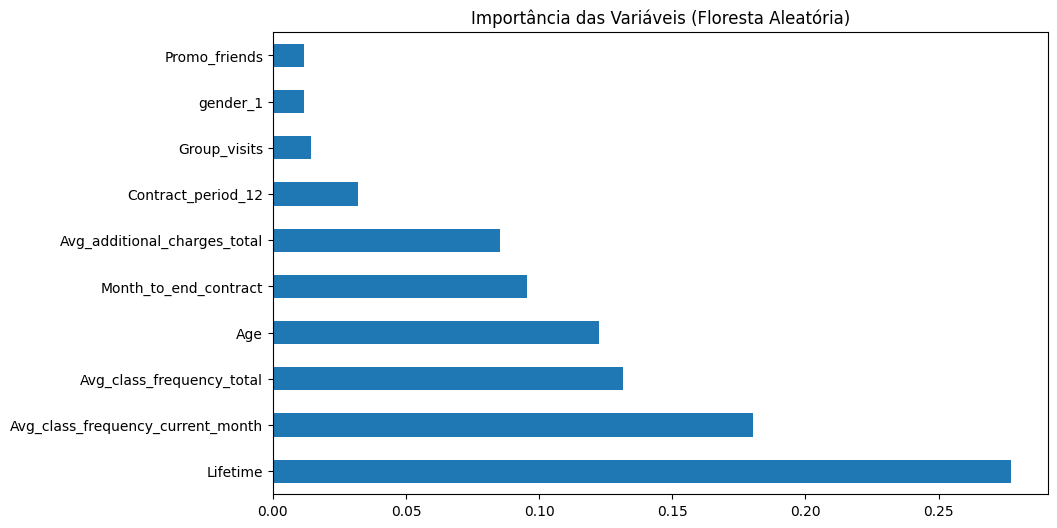


</div>

## Criando agrupamentos de clientes

In [33]:
from sklearn.preprocessing import StandardScaler

# Definindo X como todas as variáveis, exceto a variável 'Churn' (que é a variável alvo)
X = df.drop('Churn', axis=1)

# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados
X_scaled = scaler.fit_transform(X)

# Visualizando os primeiros valores das variáveis padronizadas
print(X_scaled[:5])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]]


In [34]:
import numpy as np

# Calcular a média e desvio padrão para verificar a padronização
print("Média das variáveis padronizadas:\n", np.mean(X_scaled, axis=0))
print("Desvio padrão das variáveis padronizadas:\n", np.std(X_scaled, axis=0))

Média das variáveis padronizadas:
 [ 7.77156117e-17  1.84741111e-16 -4.44089210e-17 -6.92779167e-17
  1.09245946e-16 -5.37347944e-17 -8.17124146e-17  4.01456646e-16
 -5.32907052e-17 -8.88178420e-18  2.84217094e-17 -8.88178420e-18
  7.10542736e-17]
Desvio padrão das variáveis padronizadas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [35]:
# Construindo a matriz de distâncias com o método 'ward'
Z = sch.linkage(X_scaled, method='ward')

# Verifique a forma da matriz de distâncias (Z)
print(Z[:5])  # Exibindo as primeiras 5 linhas para ter uma noção do formato

[[9.70000000e+01 3.22200000e+03 1.00990653e-01 2.00000000e+00]
 [2.61000000e+02 3.17900000e+03 1.22634574e-01 2.00000000e+00]
 [8.90000000e+02 1.75000000e+03 1.28123291e-01 2.00000000e+00]
 [2.10100000e+03 3.77300000e+03 1.44188037e-01 2.00000000e+00]
 [7.50000000e+01 1.64600000e+03 1.46525871e-01 2.00000000e+00]]


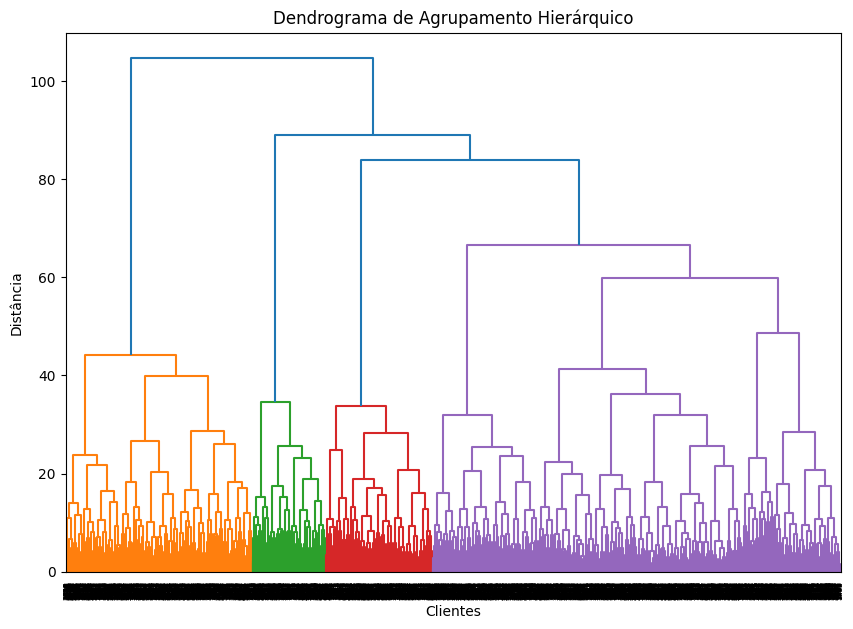

In [36]:
# Gerar o dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)

# Exibir o título e rótulos do gráfico
plt.title('Dendrograma de Agrupamento Hierárquico')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.show()

* No dendrograma, o eixo horizontal representa os clientes e o eixo vertical mostra a distância entre os agrupamentos.

* Cada ramificação do dendrograma representa a fusão de dois clusters. Quanto mais alta for a fusão, mais distantes estavam os clusters.

* Corte: Ao observar o dendrograma, podemos cortar a árvore em um determinado nível de distância (vertical) para obter um número de clusters.

In [37]:
from sklearn.cluster import KMeans

# Definir o número de clusters (n=5)
n_clusters = 5

# Treinar o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Visualizar os primeiros resultados com os novos clusters
print(df[['Cluster_KMeans']].head())

   Cluster_KMeans
0               4
1               2
2               3
3               2
4               0


In [38]:
# Contagem de clientes por cluster
cluster_counts = df['Cluster_KMeans'].value_counts()
print(cluster_counts)

3    1227
1     889
2     865
0     633
4     386
Name: Cluster_KMeans, dtype: int64


In [39]:
# Analisando as médias das variáveis por cluster
cluster_analysis = df.groupby('Cluster_KMeans').mean()
print(cluster_analysis)

                  gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster_KMeans                                                            
0               0.502370       0.949447  0.829384       0.998420    1.0   
1               0.554556       0.849269  0.263217       0.052868    1.0   
2               0.499422       0.937572  0.737572       0.478613    1.0   
3               0.485738       0.718011  0.299919       0.018745    1.0   
4               0.523316       0.862694  0.471503       0.305699    0.0   

                Contract_period  Group_visits        Age  \
Cluster_KMeans                                             
0                      3.097946      0.448657  29.104265   
1                      2.606299      0.436445  30.008999   
2                     11.854335      0.546821  29.905202   
3                      1.914425      0.276284  28.083945   
4                      4.777202      0.427461  29.297927   

                Avg_additional_charges_total  Month_t

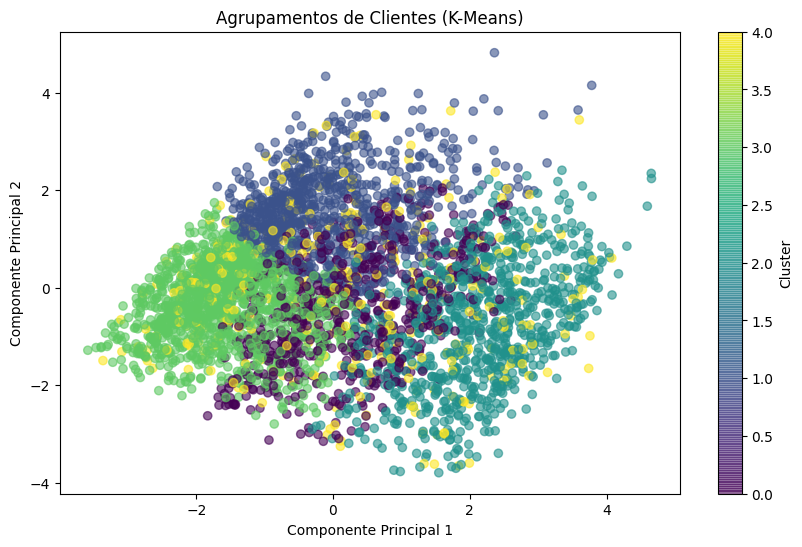

In [40]:
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade com PCA (2 componentes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_KMeans'], cmap='viridis', alpha=0.6)
plt.title('Agrupamentos de Clientes (K-Means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Muito boa visualizacao!! Caso queira visualizar o centro de cada cluster, pode ser feito assim: 
    
</div>

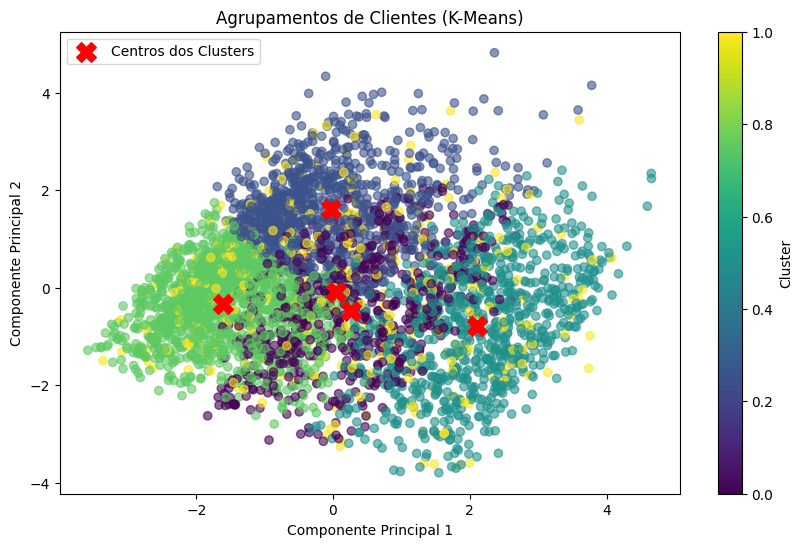

In [42]:
#Codigo ajustado pela revisor para visualizar centro do clusters

import numpy as np

# Reduzindo a dimensionalidade com PCA (2 componentes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calculando os centróides dos clusters no espaço PCA
cluster_centers = []
for cluster_id in sorted(df['Cluster_KMeans'].unique()):
    cluster_points = X_pca[df['Cluster_KMeans'] == cluster_id]
    cluster_center = cluster_points.mean(axis=0)
    cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)

# Plotando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_KMeans'], cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centros dos Clusters')
plt.title('Agrupamentos de Clientes (K-Means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [43]:
from sklearn.metrics import silhouette_score

# Calculando o índice de Silhueta
silhouette = silhouette_score(X_scaled, df['Cluster_KMeans'])
print(f"Índice de Silhueta: {silhouette}")

Índice de Silhueta: 0.1270229847466362


/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


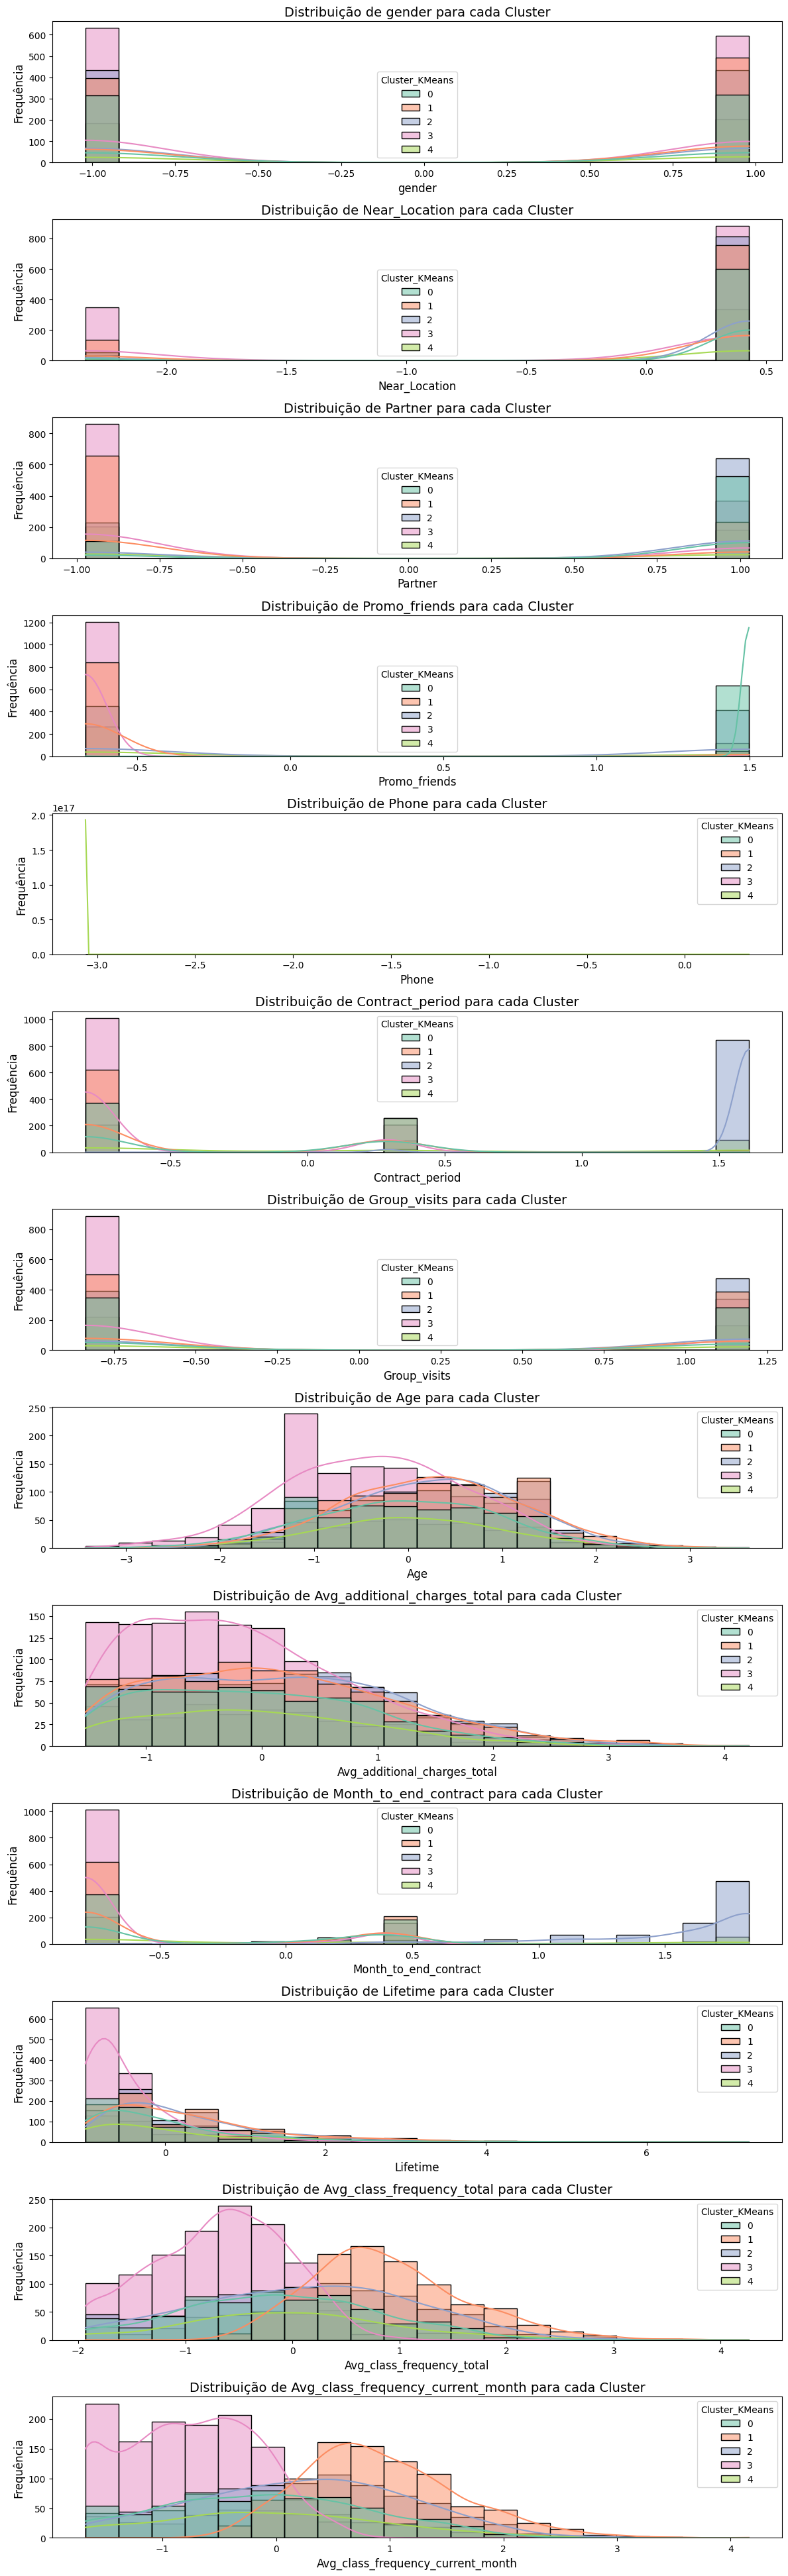

In [44]:
# Criar um DataFrame com os dados padronizados e o rótulo do cluster
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Assumindo que 'X_scaled' são seus dados padronizados
X_scaled_df['Cluster_KMeans'] = kmeans.labels_  # Adicionar os rótulos do cluster

# Criar gráficos de distribuições para as características em cada cluster
features = X.columns  # Lista de características
n_features = len(features)

# Plotar os histogramas para cada característica em cada cluster
fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features))

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=X_scaled_df, x=feature, hue="Cluster_KMeans", kde=True, ax=ax, bins=20, palette="Set2")
    ax.set_title(f'Distribuição de {feature} para cada Cluster', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()


* Grupo 2 parece ser o mais fiel e envolvido com a academia, com alta frequência de aulas, maior gasto adicional e contratos mais longos, além de uma taxa de rotatividade muito baixa.

* Grupo 3 tem o maior risco de rotatividade, com a menor frequência de aulas, menor engajamento em atividades em grupo, contratos curtos e menores gastos adicionais.

* Grupo 1 tem características intermediárias e parece ser um grupo equilibrado em termos de engajamento, mas com uma taxa de rotatividade razoável.

* Grupo 0 e 4 são mais difíceis de categorizar diretamente, mas suas características podem indicar um comportamento semelhante, com rotatividade intermediária e gasto adicional moderado

In [45]:
# Calcular a taxa de rotatividade (média da coluna Churn) para cada cluster
churn_rate_by_cluster = df.groupby('Cluster_KMeans')['Churn'].mean()

# Exibir a taxa de rotatividade para cada cluster
print(churn_rate_by_cluster)

Cluster_KMeans
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


Propensos a sair (alta taxa de churn):

* Cluster 3 (57.29%) e Cluster 4 (26.68%) têm taxas de rotatividade mais altas, o que indica que esses grupos são mais propensos a sair do serviço.

Leais (baixa taxa de churn):

* Cluster 2 (2.20%) e Cluster 1 (8.99%) têm taxas de rotatividade baixas, o que indica que os clientes desses grupos são leais e têm uma maior probabilidade de permanecer com o serviço.


1. **Focar na retenção dos clientes de alta rotatividade (Cluster 3 e 4)**
   **Conclusão**: Clientes nos clusters 3 (57.29% de rotatividade) e 4 (26.68% de rotatividade) apresentam altas taxas de churn, ou seja, estão mais propensos a sair.
   - **Recomendação**: Desenvolver campanhas específicas para **engajamento** e **satisfação do cliente**. Isso pode incluir ofertas personalizadas, suporte dedicado ou uma revisão dos motivos que estão levando ao churn (por exemplo, melhorias no serviço ou novos benefícios).
   - **Exemplo de Implementação**: Enviar ofertas exclusivas, descontos ou promoções personalizadas via e-mail ou notificação dentro do app, com base no comportamento do cliente. Além disso, criar uma linha de atendimento prioritário para esses clientes.

2. **Reforçar o relacionamento com os clientes mais leais (Cluster 1 e 2)**
   **Conclusão**: Os clusters 1 (8.99% de rotatividade) e 2 (2.20% de rotatividade) demonstram que esses clientes são altamente leais e têm baixas taxas de churn.
   - **Recomendação**: **Recompensar a lealdade** desses clientes com programas de fidelidade ou benefícios exclusivos para aumentar ainda mais a retenção e satisfação.
   - **Exemplo de Implementação**: Introduzir um programa de pontos ou recompensas que ofereça benefícios adicionais, como acesso antecipado a novos produtos ou serviços, ou descontos exclusivos para renovação de contrato.

3. **Segmentação e personalização das interações**
   **Conclusão**: Cada cluster de clientes tem diferentes comportamentos e necessidades. Por isso, um modelo de comunicação personalizado é essencial para melhorar a experiência do cliente e otimizar a retenção.
   - **Recomendação**: Usar os dados para **segmentar clientes de maneira precisa** e oferecer interações personalizadas de acordo com o grupo de comportamento de cada um.
   - **Exemplo de Implementação**: Criar campanhas de marketing direcionadas para cada cluster, como campanhas de e-mail com mensagens personalizadas, baseadas no histórico de compras ou no engajamento dos clientes. Para clientes com alta probabilidade de churn, focar em incentivar sua fidelidade com abordagens que visem resolver problemas específicos que os clientes possam estar enfrentando.

4. **Monitoramento contínuo e feedback proativo**
   **Conclusão**: Manter um **monitoramento contínuo** das taxas de rotatividade e coletar feedback diretamente dos clientes ajuda a identificar rapidamente quaisquer problemas antes que eles se tornem questões maiores.
   - **Recomendação**: Implementar um sistema de **feedback contínuo**, como pesquisas rápidas após interações de atendimento ou no final de ciclos contratuais, para entender a satisfação e identificar pontos de melhoria.
   - **Exemplo de Implementação**: Enviar pesquisas de satisfação e Net Promoter Score (NPS) para clientes de diferentes clusters, especialmente para os mais propensos ao churn, e usar os insights para ajustar as ofertas e serviços.


<div class="alert alert-success">
<strong>Comentário</strong>

Conclusão completa e muito bem fundamentada nos dados. Parabéns!

</div>